Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load Data

In [2]:
df = pd.read_csv('../data/diet_data.csv')
df.head()

,Date,Stone,Pounds,Ounces,weight_oz,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight,change
0,7/30/2018,12.0,2.0,6.0,2726.0,1950.0,0.72,1.0,1.0,0.0,0.0,0.0,0.0,-30.0
1,7/31/2018,12.0,0.0,8.0,2696.0,2600.0,0.96,1.0,0.0,0.0,0.0,0.0,0.0,8.0
2,8/1/2018,12.0,1.0,0.0,2704.0,2500.0,0.92,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,8/2/2018,12.0,1.0,0.0,2704.0,1850.0,0.68,1.0,1.0,0.0,1.0,0.0,0.0,-40.0
4,8/3/2018,11.0,12.0,8.0,2664.0,2900.0,1.09,1.0,1.0,0.0,0.0,0.0,0.0,14.0


In [3]:
# take only the date and calories columns
df = df[['Date', 'calories']]

# rename the 'Date' column
df = df.rename(columns={'Date': 'date'})
df

,date,calories
0,7/30/2018,1950.0
1,7/31/2018,2600.0
2,8/1/2018,2500.0
3,8/2/2018,1850.0
4,8/3/2018,2900.0
...,...,...
146,12/23/2018,NaN
147,12/24/2018,NaN
148,12/25/2018,NaN
149,12/26/2018,NaN


In [4]:
# check info and shape
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      150 non-null    object 
 1   calories  140 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


(151, 2)

In [5]:
# convert Date column into datetime
df['date'] = pd.to_datetime(df['date'])

Handling Missing Values

In [6]:
# check for missing values
df.isna().sum()

date         1
calories    11
dtype: int64

In [7]:
# show rows with missing values
df[df.isna().any(axis=1)]

,date,calories
60,2018-09-28,NaN
61,2018-09-29,NaN
62,2018-09-30,NaN
143,2018-12-20,NaN
144,2018-12-21,NaN
145,2018-12-22,NaN
146,2018-12-23,NaN
147,2018-12-24,NaN
148,2018-12-25,NaN
149,2018-12-26,NaN


In [8]:
# input missing values in the 'calories' column
df['calories'] = df['calories'].interpolate(method='linear', limit_direction='forward')

# drop missing values in the 'date' column
df = df.dropna(subset=['date'])

# check for missing values
df.isna().sum()

date        0
calories    0
dtype: int64

In [9]:
# check row index 55 - 65
df.iloc[55:66]

,date,calories
55,2018-09-23,5900.0
56,2018-09-24,2400.0
57,2018-09-25,1900.0
58,2018-09-26,2300.0
59,2018-09-27,2550.0
60,2018-09-28,3362.5
61,2018-09-29,4175.0
62,2018-09-30,4987.5
63,2018-10-01,5800.0
64,2018-10-02,2500.0


In [10]:
# check row index 140 - 149
df.iloc[140:150]

,date,calories
140,2018-12-17,1950.0
141,2018-12-18,1900.0
142,2018-12-19,1500.0
143,2018-12-20,1500.0
144,2018-12-21,1500.0
145,2018-12-22,1500.0
146,2018-12-23,1500.0
147,2018-12-24,1500.0
148,2018-12-25,1500.0
149,2018-12-26,1500.0


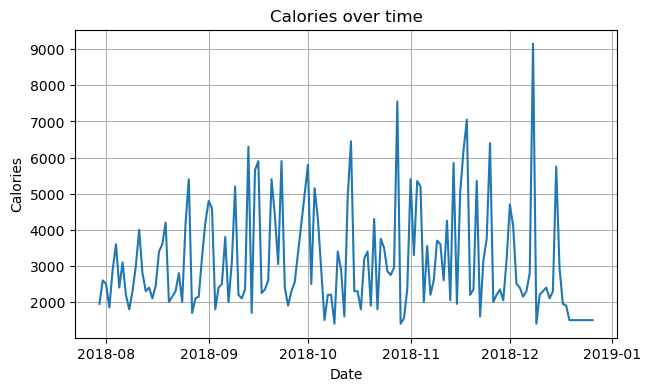

In [11]:
# visualize the data
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
plt.plot(df['date'], df['calories'])
plt.title('Calories over time')
plt.xlabel('Date')
plt.ylabel('Calories')
plt.grid()
plt.show()

In [12]:
# drop row 143-149
df = df.drop(df.index[143:150])
df.shape

(143, 2)

In [13]:
# check descriptive statistics
df.describe()

,date,calories
count,143,143.000000
mean,2018-10-09 00:00:00,3201.573427
min,2018-07-30 00:00:00,1400.000000
25%,2018-09-03 12:00:00,2200.000000
50%,2018-10-09 00:00:00,2600.000000
75%,2018-11-13 12:00:00,4050.000000
max,2018-12-19 00:00:00,9150.000000
std,NaN,1473.180027


Handling Outliers

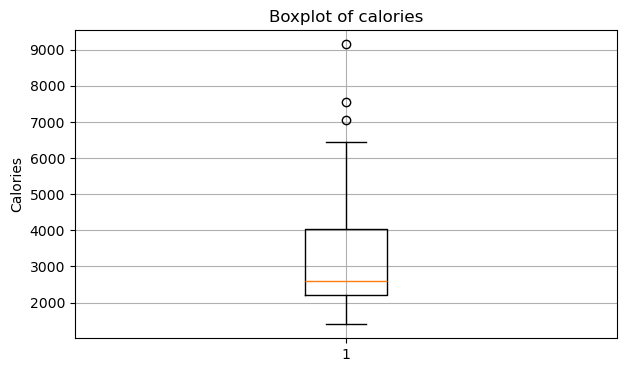

In [14]:
# check for outliers
plt.figure(figsize=(7, 4))
plt.boxplot(df['calories'])
plt.title('Boxplot of calories')
plt.ylabel('Calories')
plt.grid()
plt.show()


In [15]:
# changing outliers in 'calories' column
Q1 = (df['calories']).quantile(0.25)
Q3 = (df['calories']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

lower_than = df['calories'] < minimum
more_than = df['calories'] > maximum

df['calories'].mask(lower_than, minimum, inplace=True)
df['calories'].mask(more_than, maximum, inplace=True)

C:\Users\hasta\AppData\Local\Temp\ipykernel_13844\862834354.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['calories'].mask(lower_than, minimum, inplace=True)
C:\Users\hasta\AppData\Local\Temp\ipykernel_13844\862834354.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

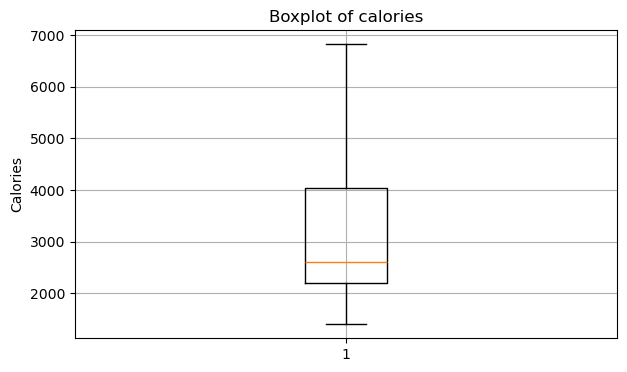

In [16]:
# check for outliers 
plt.figure(figsize=(7, 4))
plt.boxplot(df['calories'])
plt.title('Boxplot of calories')
plt.ylabel('Calories')
plt.grid()
plt.show()

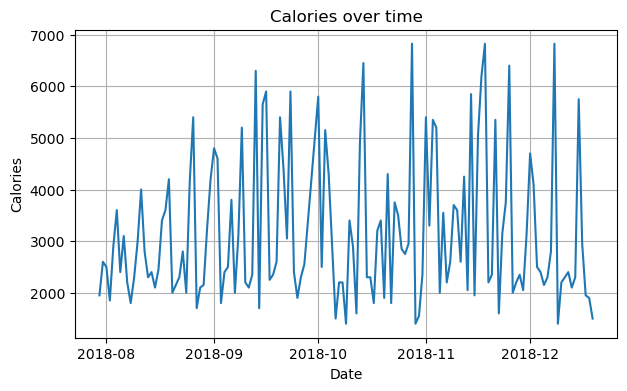

In [17]:
plt.figure(figsize=(7, 4))
plt.plot(df['date'], df['calories'])
plt.title('Calories over time')
plt.xlabel('Date')
plt.ylabel('Calories')
plt.grid()
plt.show()

Add columns fat, sugar, and salt

fat = 20% from total calories 
sugar = 10% from total calories
salt = recommend 5 grams/day, we fill it with random values between 0-5 (dummy data)

Download the Cleaned Data to CSV file

In [18]:
# download the cleaned data to a new csv file
# df.to_csv('data/cleaned_diet_data.csv', index=False)

In [19]:
# make df for snacks data
df['snack_calories'] = df['calories'] * 0.125

df_snacks = df[['date', 'snack_calories']]
df_snacks

,date,snack_calories
0,2018-07-30,243.75
1,2018-07-31,325.00
2,2018-08-01,312.50
3,2018-08-02,231.25
4,2018-08-03,362.50
...,...,...
138,2018-12-15,718.75
139,2018-12-16,368.75
140,2018-12-17,243.75
141,2018-12-18,237.50


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 0 to 142
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            143 non-null    datetime64[ns]
 1   calories        143 non-null    float64       
 2   snack_calories  143 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 4.5 KB


In [21]:
df_snacks.to_csv('../data/cleaned_diet_data_snacks.csv', index=False)